In [1]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = np.linspace(-0.5,2.5,100)
y = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, y)

# Multi-dimensional root-finding

In [3]:
def curve_residual(x,y, x_a, y_a, r_a):
    return (x-x_a)**4 + (y-y_a)**4 - r_a**4

r_a = 0.7
x_a = 1
y_a = 0

r_b = 0.5
y_b = 0.3
x_b = 0.5

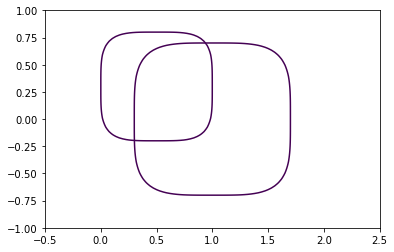

In [4]:
plt.close("all")
fig, ax = plt.subplots()
ax.contour(X, Y, curve_residual(X,Y,x_a,y_a,r_a), levels=[0])
ax.contour(X, Y, curve_residual(X,Y,x_b,y_b,r_b), levels=[0])
plt.show()

In [5]:
def curve_curve_residual(xy):
    r1 = curve_residual(xy[0],xy[1], x_a, y_a, r_a)
    r2 = curve_residual(xy[0],xy[1], x_b, y_b, r_b)
    return np.array([r1**2, r2**2])

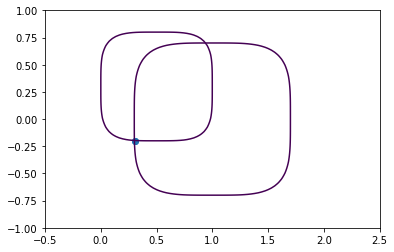

In [6]:
a = optimize.broyden1(curve_curve_residual, [0,-.3])

plt.close("all")
fig, ax = plt.subplots()
ax.contour(X, Y, curve_residual(X,Y,x_a,y_a,r_a), levels=[0])
ax.contour(X, Y, curve_residual(X,Y,x_b,y_b,r_b), levels=[0])
ax.scatter(*zip(a,a))
plt.show()

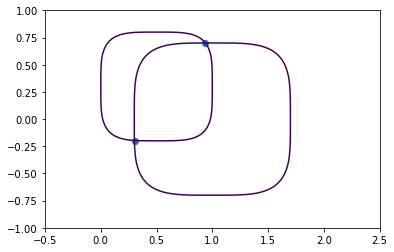

In [7]:
b = optimize.root(curve_curve_residual, [0,1]).x

plt.close("all")
fig, ax = plt.subplots()
ax.contour(X, Y, curve_residual(X,Y,x_a,y_a,r_a), levels=[0])
ax.contour(X, Y, curve_residual(X,Y,x_b,y_b,r_b), levels=[0])
ax.scatter(*zip(a,b))
plt.show()

In [8]:
a,b

(array([ 0.30291216, -0.19980469]), array([ 0.93829302,  0.69998943]))

## Optimization

In [9]:
def curve_curve_energy(xy):
    r1 = curve_residual(xy[0],xy[1], x_a, y_a, r_a)
    r2 = curve_residual(xy[0],xy[1], x_b, y_b, r_b)
    return r1**2 + r2**2

c = optimize.minimize(curve_curve_energy, [0,1]).x

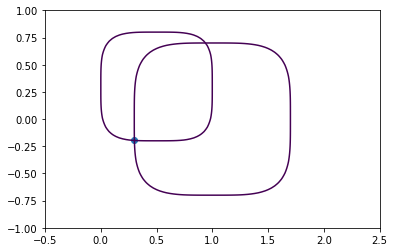

In [10]:
plt.close("all")
fig, ax = plt.subplots()
ax.contour(X, Y, curve_residual(X,Y,x_a,y_a,r_a), levels=[0])
ax.contour(X, Y, curve_residual(X,Y,x_b,y_b,r_b), levels=[0])
ax.scatter(c[0],c[1])
plt.show()

In [11]:
c

array([ 0.30109676, -0.19683918])